In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import keras
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [2]:
print(tf.__version__)


2.3.1


### Data Directory:

In [3]:
data_dir = './CellData/chest_xray/'

train_dir = data_dir + 'train/'
test_dir = data_dir + 'test/'

# TRAIN DIRECTORY
normal_train_fol = train_dir + 'NORMAL/'
pneumonia_train_fol = train_dir + 'PNEUMONIA/'
# TEST DIRECTORY
normal_test_fol = train_dir + 'NORMAL/'
pneumonia_test_fol = train_dir + 'PNEUMONIA/'


In [4]:
os.listdir('CellData/chest_xray/train/NORMAL')

['NORMAL-2552119-0002.jpeg',
 'NORMAL-7298141-0001.jpeg',
 'NORMAL-3411116-0002.jpeg',
 'NORMAL-1619233-0001.jpeg',
 'NORMAL-7327513-0001.jpeg',
 'NORMAL-2699389-0001.jpeg',
 'NORMAL-3781678-0001.jpeg',
 'NORMAL-8648239-0002.jpeg',
 'NORMAL-5728847-0001.jpeg',
 'NORMAL-6881695-0001.jpeg',
 'NORMAL-8903542-0001.jpeg',
 'NORMAL-715046-0001.jpeg',
 'NORMAL-6084744-0001.jpeg',
 'NORMAL-4994733-0001.jpeg',
 'NORMAL-3853078-0002.jpeg',
 'NORMAL-5264964-0001.jpeg',
 'NORMAL-3573766-0003.jpeg',
 'NORMAL-71482-0001.jpeg',
 'NORMAL-6702380-0001.jpeg',
 'NORMAL-6710847-0001.jpeg',
 'NORMAL-5759621-0001.jpeg',
 'NORMAL-6047821-0001.jpeg',
 'NORMAL-9989984-0001.jpeg',
 'NORMAL-2675017-0001.jpeg',
 'NORMAL-2333546-0001.jpeg',
 'NORMAL-2881863-0001.jpeg',
 'NORMAL-7157255-0001.jpeg',
 'NORMAL-2411226-0001.jpeg',
 'NORMAL-4946392-0001.jpeg',
 'NORMAL-9175762-0002.jpeg',
 'NORMAL-705474-0001.jpeg',
 'NORMAL-28501-0001.jpeg',
 'NORMAL-9000251-0001.jpeg',
 'NORMAL-9816293-0002.jpeg',
 'NORMAL-2559035-000

### X-RAY IMAGE FOR NORMAL VS PNEUMONIA 

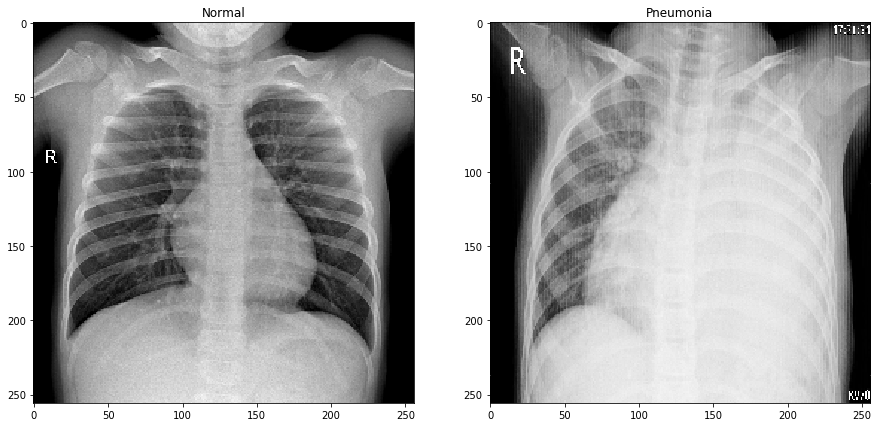

In [5]:
# Loading image:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(15,15))
img1 = load_img(f'{normal_train_fol}/NORMAL-28501-0001.jpeg', target_size=(256,256))
ax[0].imshow(img1)
ax[0].set_title('Normal');


img2 = load_img(f'{pneumonia_train_fol}/BACTERIA-8738712-0003.jpeg', target_size=(256,256))
ax[1].imshow(img2)
ax[1].set_title('Pneumonia');


From the x-ray, we can see that the patient with pneumonia has a foggier x-ray due to the fluid in the lung.


In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

# Directory path
train_data_dir = 'CellData/chest_xray/train'
test_data_dir = 'CellData/chest_xray/test'

# Get all the data in the directory data/validation (500 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=624)

# Get all the data in the directory data/train (500 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=5232)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


In [14]:
## NORMAL GENERATOR FOR TRAINING SET
train_normal_dir = 'CellData/chest_xray/train/NORMAL'
train_pneumonia_dir = 'CellData/chest_xray/train/PNEUMONIA'
train_normal_generator = ImageDataGenerator().flow_from_directory(
        train_normal_dir, 
        target_size=(256, 256))

# Get all the data in the directory data/train (500 images), and reshape them
train_pneumonia_generator = ImageDataGenerator().flow_from_directory(
        train_pneumonia_dir, 
        target_size=(256, 256))


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


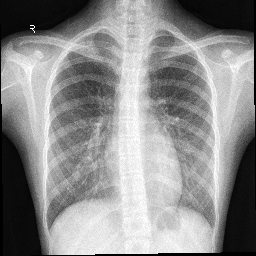

In [7]:
array_to_img(train_images[10])


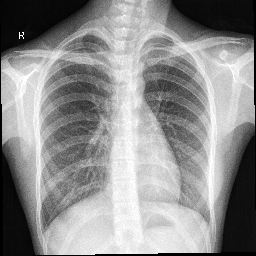

In [8]:
array_to_img(test_images[10])


In [9]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(5232, 256, 256, 3)
(5232, 2)
(624, 256, 256, 3)
(624, 2)


## Data Augmentation:

Function to flip and mirror individual image

In [10]:
def flip_img(img):
    return tf.image.flip_left_right(img)

In [11]:
def add_flipped_to_train_set(train_images):
    for img in train_images:
        print(flip_img(img))


SyntaxError: invalid syntax (<ipython-input-11-5b5ddff45a5b>, line 4)

In [15]:
add_flipped_to_train_set(train_images)

NameError: name 'add_flipped_to_train_set' is not defined

In [16]:
len(train_images)

5232

In [17]:
flipped = tf.image.flip_left_right(train_images[10])


In [18]:
train_images[10], len(flipped)

(array([[[ 8.,  8.,  8.],
         [ 8.,  8.,  8.],
         [11., 11., 11.],
         ...,
         [12., 12., 12.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 9.,  9.,  9.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.],
         ...,
         [14., 14., 14.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 8.,  8.,  8.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.],
         ...,
         [12., 12., 12.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
  

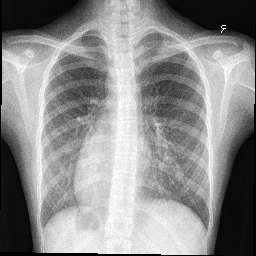

In [19]:
array_to_img(flipped)

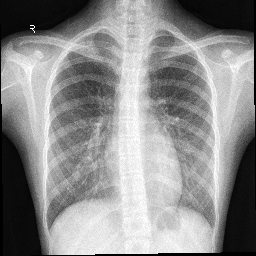

In [20]:
array_to_img(train_images[10])